In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [4]:
X = iris.data
y = iris.target

In [5]:
dtree_clf = DecisionTreeClassifier(max_depth=4, random_state=41)

In [6]:
dtree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=41,
            splitter='best')

In [7]:
from sklearn.tree import export_graphviz

In [8]:
export_graphviz(dtree_clf, 
                out_file="./iris_tree.dot", 
                feature_names=iris.feature_names, 
                class_names=iris.target_names, rounded=True, filled=True)

# Train and fine tune moon dataset

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas import DataFrame
from matplotlib import pyplot

In [10]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [11]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}

/Users/shweta/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


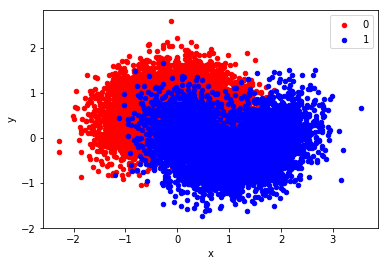

In [12]:
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, colors=colors[key])
    
pyplot.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [14]:
param_grid ={'max_leaf_nodes': list(range(3,100)), 'min_samples_split':[2,3,4]}
gscv = GridSearchCV(DecisionTreeClassifier(random_state=43), param_grid, n_jobs=-1, cv=3, verbose=1)

In [15]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 291 candidates, totalling 873 fits


[Parallel(n_jobs=-1)]: Done 873 out of 873 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbos

In [16]:
gscv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=24,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best')

In [17]:
y_pred = gscv.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.856

# Grow Forest

In [19]:
from sklearn.model_selection import ShuffleSplit

In [20]:
sub_sets = []
ss = ShuffleSplit(n_splits=1000, test_size=len(X_train)-100, random_state=41)
for train_index, test_index in ss.split(X_train):
    sub_sets.append((X_train[train_index], y_train[train_index]))

In [21]:
from sklearn.base import clone
forest = [clone(gscv.best_estimator_) for _ in range(1000)]

accuracy_scores = []

for tree, (X_sub_train, y_sub_train) in zip(forest, sub_sets):
    tree.fit(X_sub_train, y_sub_train)
    y_pred = tree.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
accuracy_scores

[0.8046666666666666,
 0.832,
 0.804,
 0.728,
 0.8183333333333334,
 0.802,
 0.7583333333333333,
 0.7813333333333333,
 0.8053333333333333,
 0.7466666666666667,
 0.81,
 0.7916666666666666,
 0.7956666666666666,
 0.8123333333333334,
 0.77,
 0.8163333333333334,
 0.7736666666666666,
 0.787,
 0.7613333333333333,
 0.7846666666666666,
 0.76,
 0.8013333333333333,
 0.8143333333333334,
 0.7593333333333333,
 0.773,
 0.7833333333333333,
 0.8113333333333334,
 0.7666666666666667,
 0.7856666666666666,
 0.777,
 0.8473333333333334,
 0.782,
 0.8216666666666667,
 0.7853333333333333,
 0.7623333333333333,
 0.7843333333333333,
 0.777,
 0.824,
 0.7723333333333333,
 0.796,
 0.755,
 0.8106666666666666,
 0.7613333333333333,
 0.828,
 0.778,
 0.8253333333333334,
 0.746,
 0.8066666666666666,
 0.7363333333333333,
 0.7926666666666666,
 0.7936666666666666,
 0.7516666666666667,
 0.7613333333333333,
 0.8133333333333334,
 0.783,
 0.802,
 0.8016666666666666,
 0.8173333333333334,
 0.8113333333333334,
 0.7656666666666667,
 0.

In [22]:
import numpy as np

In [23]:
np.mean(accuracy_scores)

0.7832953333333332

In [24]:
y_pred_f = np.empty([1000,len(X_test)], np.uint8)

for tree_index, tree in enumerate(forest):
    y_pred_f[tree_index] = tree.predict(X_test)

In [26]:
from scipy.stats import mode
y_pred_maj_vot, n_votes = mode(y_pred_f, axis=0)

In [28]:
accuracy_score(y_test, y_pred_maj_vot.reshape([-1]))

0.8553333333333333